##       INVESTMENT ANALYSIS

### Part 1 – Indexes Analysis:

#### Choosing four major Indexes Markets to determine which of them outperform best across multiple areas: volatility, returns, risk, and Sharpe ratios.

1.	S&P500 (GSPC). 
2.	NASDAQ Composite (IXIC). 
3.	S&P/ASX 200 (ASX). 
4.	DJCI (Dow Jones Commodity)
5.	CryptoCap(BTC-USD).


In [4]:
# Initial imports
import panel as pn
import requests
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
from MCForecastTools import MCSimulation
import json
import yfinance as yf
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

### 1.	Prepare the Data: 

#### Collect Investments Data Using yfinance

In [6]:
# Get all data history of 3 years using yf funtion and "Close Price":
df = yf.download("^AXJO BTC-USD ^IXIC ^GSPC DJCI", start="2018-01-01", end="2021-02-28")
df_indexes = df['Close'].dropna()
df_indexes.head()

[*********************100%***********************]  5 of 5 completed


,BTC-USD,DJCI,^AXJO,^GSPC,^IXIC
Date,,,,,
2018-01-02,14982.099609,16.123800,6061.299805,2695.810059,7006.899902
2018-01-03,15201.000000,16.140100,6070.399902,2713.060059,7065.529785
2018-01-04,15599.200195,16.154900,6077.100098,2723.989990,7077.910156
2018-01-05,17429.500000,16.018499,6122.299805,2743.149902,7136.560059
2018-01-08,15170.099609,16.021999,6130.399902,2747.709961,7157.390137


### Quantitative Analysis:

In [10]:
# Calculate Daily Returns
indexes_daily_return = df_indexes.pct_change()
indexes_daily_return.dropna(inplace=True)
indexes_daily_return.head()

,BTC-USD,DJCI,^AXJO,^GSPC,^IXIC
Date,,,,,
2018-01-03,0.014611,0.001011,0.001501,0.006399,0.008367
2018-01-04,0.026196,0.000917,0.001104,0.004029,0.001752
2018-01-05,0.117333,-0.008443,0.007438,0.007034,0.008286
2018-01-08,-0.129631,0.000218,0.001323,0.001662,0.002919
2018-01-09,-0.037884,0.004563,0.000881,0.001303,0.000865


In [12]:
# Rename Indexes names Column to be specific to this portfolio.
columns = ["BTC", "Dow Jones Commodity", "S&P/ASX 200", "S&P 500", "NASDAQ Composite"]
indexes_daily_return.columns = columns
indexes_daily_return.head()

,BTC,Dow Jones Commodity,S&P/ASX 200,S&P 500,NASDAQ Composite
Date,,,,,
2018-01-03,0.014611,0.001011,0.001501,0.006399,0.008367
2018-01-04,0.026196,0.000917,0.001104,0.004029,0.001752
2018-01-05,0.117333,-0.008443,0.007438,0.007034,0.008286
2018-01-08,-0.129631,0.000218,0.001323,0.001662,0.002919
2018-01-09,-0.037884,0.004563,0.000881,0.001303,0.000865


In [14]:
# plot daily returns
indexes_daily_return.hvplot(figsize=(20,10), title='Daily Returns of 5 Major World Indeces')

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [16]:
# Calculate and plot cumulative returns for all Indeces.

# Calculate cumulative returns of all Indeces
cumulative_returns = (1 + indexes_daily_return).cumprod()
cumulative_returns

# Plot cumulative returns
cumulative_returns.hvplot(figsize=(30,20), title='Cumulative Returns of 5 Major World Indeces')

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

### Risk Analysis:

In [17]:
# Calculate the standard deviation for each portfolio.
# Determine which portfolios are riskier 
daily_std_all_indeces = indexes_daily_return.std().sort_values(ascending = False)
daily_std_all_indeces

BTC                    0.047478
NASDAQ Composite       0.016167
S&P 500                0.014716
S&P/ASX 200            0.012384
Dow Jones Commodity    0.009494
dtype: float64

In [18]:
# Calculate the Annualized Standard Deviation
annualized_std = daily_std_all_indeces * np.sqrt(252)
annualized_std

BTC                    0.753685
NASDAQ Composite       0.256640
S&P 500                0.233602
S&P/ASX 200            0.196586
Dow Jones Commodity    0.150709
dtype: float64

### Sharpe Ratios:

In [19]:
# Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
# Annualized Sharpe Ratios:
sharpe_ratios = (indexes_daily_return.mean() * 252) / (indexes_daily_return.std() * np.sqrt(252))
sharpe_ratios.sort_values()

Dow Jones Commodity   -0.269652
S&P/ASX 200            0.275010
S&P 500                0.601294
BTC                    0.789646
NASDAQ Composite       0.941736
dtype: float64

In [21]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.hvplot.bar(title='Sharpe Ratios of 5 Major World Indexes')

:Bars   [index]   (0)

In [23]:
# Determine which Indexes outperform best.
print(f"According to the Risk Analysis, the riskier indeces are Dow Jones Commodity with 0.009494 std and S&P/ASX 200 with 0.196586." 
      f"The indeces that outperform best are BTC with 0.047478 std and NASDAQ Composite with 0.016167 std and the third good performace was S&P 500 0.014716 std.")

According to the Risk Analysis, the riskier indeces are Dow Jones Commodity with 0.009494 std and S&P/ASX 200 with 0.196586.The indeces that outperform best are BTC with 0.047478 std and NASDAQ Composite with 0.016167 std and the third good performace was S&P 500 0.014716 std.


## Part 2 - Retirement Plan Tool:

#### According to Indexes front part 1, select them to project their performance in 10-, 20- & 30-years using Monte Carlo simulations.

In [24]:
# Get all data history of 5 years using yf funtion and "Close Price":
portfolio_df = yf.download("^AXJO BTC-USD ^IXIC ^GSPC DJCI", start="2018-01-01", end="2020-11-30").dropna()
portfolio_df = portfolio_df.swaplevel(axis=1)
portfolio_df = portfolio_df.rename(columns=str.lower)
portfolio_df.head()

[*********************100%***********************]  5 of 5 completed


,btc-usd,djci,^axjo,^gspc,^ixic,btc-usd,djci,^axjo,^gspc,^ixic,...,btc-usd,djci,^axjo,^gspc,^ixic,btc-usd,djci,^axjo,^gspc,^ixic
,adj close,adj close,adj close,adj close,adj close,close,close,close,close,close,...,open,open,open,open,open,volume,volume,volume,volume,volume
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,14982.099609,16.123800,6061.299805,2695.810059,7006.899902,14982.099609,16.123800,6061.299805,2695.810059,7006.899902,...,13625.000000,16.170000,6065.100098,2683.729980,6937.649902,1.684660e+10,6151.0,0.0,3.367250e+09,1.914930e+09
2018-01-03,15201.000000,16.140100,6070.399902,2713.060059,7065.529785,15201.000000,16.140100,6070.399902,2713.060059,7065.529785,...,14978.200195,16.125000,6061.299805,2697.850098,7017.069824,1.687190e+10,4381.0,0.0,3.538660e+09,2.166780e+09
2018-01-04,15599.200195,16.154900,6077.100098,2723.989990,7077.910156,15599.200195,16.154900,6077.100098,2723.989990,7077.910156,...,15270.700195,16.167700,6070.399902,2719.310059,7089.500000,2.178320e+10,3303.0,0.0,3.695260e+09,2.098890e+09
2018-01-05,17429.500000,16.018499,6122.299805,2743.149902,7136.560059,17429.500000,16.018499,6122.299805,2743.149902,7136.560059,...,15477.200195,16.090000,6077.100098,2731.330078,7105.740234,2.384090e+10,27163.0,0.0,3.236620e+09,2.020900e+09
2018-01-08,15170.099609,16.021999,6130.399902,2747.709961,7157.390137,15170.099609,16.021999,6130.399902,2747.709961,7157.390137,...,16476.199219,16.016701,6122.299805,2742.669922,7135.379883,1.841390e+10,1623.0,0.0,3.242650e+09,2.051430e+09


In [25]:
# Configuring a Monte Carlo simulation to forecast 10-, 20- & 30-years cumulative returns
MC_10years = MCSimulation(
    portfolio_data = portfolio_df,
    weights = [.20,.20,.20,.20,.20],
    num_simulation = 50,
    num_trading_days = 252*10)

MC_20years = MCSimulation(
    portfolio_data = portfolio_df,
    weights = [.20,.20,.20,.20,.20],
    num_simulation = 50,
    num_trading_days = 252*20)

MC_30years = MCSimulation(
    portfolio_data = portfolio_df,
    weights = [.20,.20,.20,.20,.20],
    num_simulation = 50,
    num_trading_days = 252*30)

MC_10years.portfolio_data.head()
MC_20years.portfolio_data.head()
MC_30years.portfolio_data.head()

btc-usd                                            \
               adj close         close          high           low   
Date                                                                 
2018-01-02  14982.099609  14982.099609  15444.599609  13163.599609   
2018-01-03  15201.000000  15201.000000  15572.799805  14844.500000   
2018-01-04  15599.200195  15599.200195  15739.700195  14522.200195   
2018-01-05  17429.500000  17429.500000  17705.199219  15202.799805   
2018-01-08  15170.099609  15170.099609  16537.900391  14208.200195   

                                                          djci             \
                    open        volume daily_return  adj close      close   
Date                                                                        
2018-01-02  13625.000000  1.684660e+10          NaN  16.123800  16.123800   
2018-01-03  14978.200195  1.687190e+10     0.014611  16.140100  16.140100   
2018-01-04  15270.700195  2.178320e+10     0.026196  16.154900  16.154900   
2018-01-05  15477.200195  2.384090e+10     0.117333  16.018499  16.018499   
2018-01-08  16476.199219  1.841390e+10    -0.129631  16.021999  16.021999   

                       ...        ^gspc                             \
                 high  ...         open        volume daily_return   
Date                   ...                                           
2018-01-02  16.170000  ...  2683.729980  3.367250e+09          NaN   
2018-01-03  16.141001  ...  2697.850098  3.538660e+09     0.006399   
2018-01-04  16.194401  ...  2719.310059  3.695260e+09     0.004029   
2018-01-05  16.100000  ...  2731.330078  3.236620e+09     0.007034   
2018-01-08  16.021999  ...  2742.669922  3.242650e+09     0.001662   

                  ^ixic                                                      \
              adj close        close         high          low         open   
Date                                                                          
2018-01-02  7006.899902  7006.899902  7006.910156  6924.080078  6937.649902   
2018-01-03  7065.529785  7065.529785  7069.149902  7016.700195  7017.069824   
2018-01-04  7077.910156  7077.910156  7098.049805  7072.379883  7089.500000   
2018-01-05  7136.560059  7136.560059  7137.040039  7097.080078  7105.740234   
2018-01-08  7157.390137  7157.390137  7161.350098  7124.089844  7135.379883   

                                       
                  volume daily_return  
Date                                   
2018-01-02  1.914930e+09          NaN  
2018-01-03  2.166780e+09     0.008367  
2018-01-04  2.098890e+09     0.001752  
2018-01-05  2.020900e+09     0.008286  
2018-01-08  2.051430e+09     0.002919  

[5 rows x 35 columns]

In [26]:
# Running a Monte Carlo simulation to forecast 10-, 20- & 30-years cumulative returns

MC_10years.calc_cumulative_return()
MC_20years.calc_cumulative_return()
MC_30years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001381,0.996237,1.000302,1.001638,1.019823,1.005414,0.999490,0.991137,0.999921,0.985134,...,1.004032,0.986411,1.013343,1.000825,0.992279,1.001292,0.985170,0.994732,0.999301,1.017034
2,1.016754,1.018219,1.000150,0.993093,1.022568,1.011870,0.999180,0.992034,0.990678,0.980797,...,0.993297,0.984825,1.016757,0.992481,1.007066,0.976759,1.005359,0.987204,1.002362,1.006063
3,1.022461,1.023211,0.995556,0.988437,1.008047,1.010635,1.001407,0.982175,0.983981,1.005563,...,0.989722,0.985898,1.015538,0.979054,1.005284,0.976592,1.013982,0.983240,1.001110,1.003718
4,1.024222,1.022143,0.991352,0.995730,1.008708,1.019888,1.001902,0.970928,0.983254,1.027434,...,0.985867,1.002468,1.026195,0.990148,1.001000,0.973592,1.028160,0.989510,1.014432,0.999181
5,1.036339,1.035326,1.001586,0.973456,0.997977,1.013553,0.987057,0.972988,1.008757,1.027133,...,0.969516,0.992091,1.015656,0.989438,0.996307,0.976831,1.029538,0.994422,1.004403,0.994488
6,1.026219,1.046647,1.006402,0.965693,0.992788,1.011390,0.998206,0.965239,1.012047,1.039942,...,0.957977,1.000800,1.043482,0.973713,0.999759,0.990471,1.027326,0.996567,1.031896,0.999682
7,1.024375,1.046406,1.010069,0.962694,0.982045,1.003989,0.965121,0.976286,1.022921,1.008962,...,0.957997,0.993672,1.042127,0.987309,0.977811,1.001148,1.034041,0.989219,1.022662,0.986396
8,1.021827,1.052638,1.030579,0.977317,1.003504,1.014939,0.967444,0.986716,1.034994,1.026342,...,0.944179,0.991635,1.054102,0.995338,0.982426,0.999846,1.043244,1.008143,1.026160,0.983649
9,1.026977,1.055469,1.037522,0.967992,1.005244,1.018160,0.943280,0.971017,1.030288,1.035449,...,0.937291,0.978842,1.049704,1.011402,0.986790,1.001900,1.049818,0.999084,1.031415,0.997475


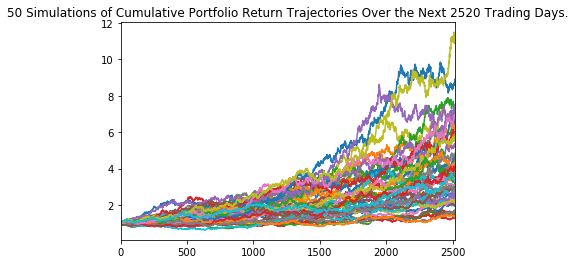

In [27]:
# Plot simulation outcomes 10 Years
MC_sim_10years = MC_10years.plot_simulation()
MC_sim_10years

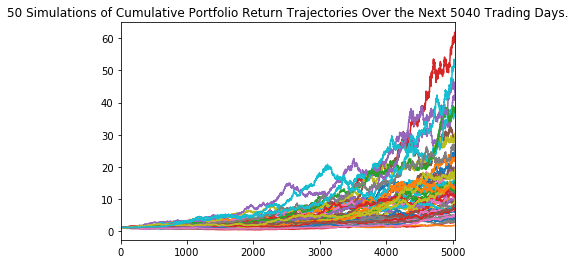

In [28]:
# Plot simulation outcomes 20 Years
MC_sim_20years = MC_20years.plot_simulation()
MC_sim_20years

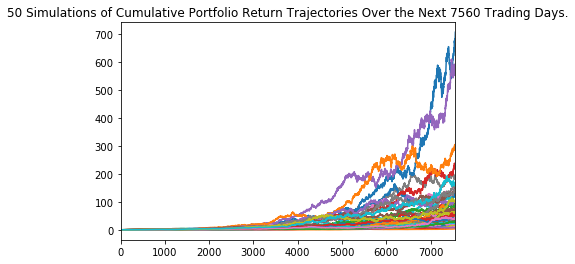

In [29]:
# Plot simulation outcomes 30 Years
MC_sim_30years = MC_30years.plot_simulation()
MC_sim_30years

### Retirement Analysis

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results of 10 Years
MC_sum_sta10 = MC_10years.summarize_cumulative_return()
print(MC_sum_sta10)

count           50.000000
mean             4.122313
std              2.176370
min              1.291807
25%              2.475551
50%              3.704130
75%              5.638939
max             11.186129
95% CI Lower     1.393358
95% CI Upper     8.546726
Name: 2520, dtype: float64


In [31]:
# Fetch summary statistics from the Monte Carlo simulation results of 20 Years
MC_sum_sta20 = MC_20years.summarize_cumulative_return()
print(MC_sum_sta20)

count           50.000000
mean            15.994480
std             13.339710
min              1.770306
25%              6.938516
50%             11.935064
75%             19.071018
max             61.484600
95% CI Lower     2.758950
95% CI Upper    50.365060
Name: 5040, dtype: float64


In [32]:
# Fetch summary statistics from the Monte Carlo simulation results of 30 Years
MC_sum_sta30 = MC_30years.summarize_cumulative_return()
print(MC_sum_sta30)

count            50.000000
mean             93.329711
std             128.295349
min               4.592935
25%              27.358407
50%              45.982004
75%             104.846867
max             707.131695
95% CI Lower      8.704663
95% CI Upper    500.095377
Name: 7560, dtype: float64


#### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on an initial investment of 20,000 and every year of 10,000 or 20,000 during each period.

##### •	Fill up -> Initial investment 20,000.
##### •	Fill up or Select yearly Investment 10,000 or 15,000 or 20,000.
##### •	Print and Plot results of 10-, 20- & 30-years cumulative returns based on above selections.

In [33]:
# Compute summary statistics from the simulated daily returns 10 Years
simulated_returns_MC_10years = {
    "mean": list(MC_10years.simulated_return.mean(axis=1)),
    "median": list(MC_10years.simulated_return.median(axis=1)),
    "min": list(MC_10years.simulated_return.min(axis=1)),
    "max": list(MC_10years.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns_MC_10years = pd.DataFrame(simulated_returns_MC_10years)

# Display sample data
df_simulated_returns_MC_10years.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.002792,1.001826,0.988801,1.021785
2,1.003656,1.003739,0.960617,1.033041
3,1.005112,1.006205,0.962153,1.044854
4,1.008791,1.008736,0.968012,1.063979


In [35]:
# Use the 'plot' function to create a chart
df_simulated_returns_MC_10years.hvplot(title="Simulated Statistics Returns of MC Over the Next 10 Year")

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [36]:
# Compute summary statistics from the simulated daily returns 20 Years
simulated_returns_MC_20years = {
    "mean": list(MC_20years.simulated_return.mean(axis=1)),
    "median": list(MC_20years.simulated_return.median(axis=1)),
    "min": list(MC_20years.simulated_return.min(axis=1)),
    "max": list(MC_20years.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns_MC_20years = pd.DataFrame(simulated_returns_MC_20years)

# Display sample data
df_simulated_returns_MC_20years.tail()

,mean,median,min,max
5036,15.955369,11.992021,1.762065,61.334666
5037,15.971400,11.901587,1.756057,61.081722
5038,16.004716,11.911728,1.735974,61.719049
5039,15.986739,11.915437,1.760881,61.448631
5040,15.994480,11.935064,1.770306,61.484600


In [37]:
# Use the 'plot' function to create a chart
df_simulated_returns_MC_20years.hvplot(title="Simulated Statistics Returns of MC Over the Next 20 Year")

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [38]:
# Compute summary statistics from the simulated daily returns 30 Years
simulated_returns_MC_30years = {
    "mean": list(MC_30years.simulated_return.mean(axis=1)),
    "median": list(MC_30years.simulated_return.median(axis=1)),
    "min": list(MC_30years.simulated_return.min(axis=1)),
    "max": list(MC_30years.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns_MC_30years = pd.DataFrame(simulated_returns_MC_30years)

# Display sample data
df_simulated_returns_MC_30years.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000405,1.000540,0.979861,1.019823
2,1.000972,1.001256,0.973769,1.029540
3,1.001383,1.001258,0.968635,1.055937
4,1.003161,1.001375,0.952859,1.062663


In [39]:
# Use the 'plot' function to create a chart
df_simulated_returns_MC_30years.hvplot(title="Simulated Statistics Returns of MC Over the Next 30 Year")

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [40]:
from ipywidgets import widgets, interact
from IPython.display import display

# Create text widget for output
initial_investment = widgets.IntText()

# Define function to bind value of the input to the output variable 
def f(x):
    initial_investment.value = str(x)
    
# Create input slider with default value = 10    
interact(f, x=(10000,50000,10000))

initial_investment

interactive(children=(IntSlider(value=30000, description='x', max=50000, min=10000, step=10000), Output()), _d…

IntText(value=30000)

In [41]:
initial_investment.value

20000

In [42]:
from ipywidgets import widgets, interact
from IPython.display import display

# Create text widget for output
annual_investment = widgets.IntText()

# Define function to bind value of the input to the output variable 
def f(x):
    annual_investment.value = str(x)
    
# Create input slider with default value = 10    
interact(f, x=(5000,50000,5000))

annual_investment

interactive(children=(IntSlider(value=25000, description='x', max=50000, min=5000, step=5000), Output()), _dom…

IntText(value=25000)

In [43]:
annual_investment.value

10000

In [44]:
from ipywidgets import widgets, interact
from IPython.display import display

# Create text widget for output
years_projection = widgets.Text()

# Define function to bind value of the input to the output variable 
def f(x):
    years_projection.value = str(x)
list_of_years = ['10','20','30']

# Create input slider with default value = 10    
interact(f, x=list_of_years)
years_projection

interactive(children=(Dropdown(description='x', options=('10', '20', '30'), value='10'), Output()), _dom_class…

Text(value='10')

In [45]:
years_projection.value

'10'

In [46]:
# Calculate the final result based on above criterias
def calculating_final_value_based_on_annual_payments(years_projection,initial_investment,annual_investment):
    years_projection = int(years_projection)
    initial_investment = float(initial_investment)
    annual_investment = float(annual_investment)
    # This is capturing final value of initial investment
    if years_projection == 10:
        simulated_returns_df = df_simulated_returns_MC_10years
    elif years_projection == 20:
        simulated_returns_df = df_simulated_returns_MC_20years
    elif years_projection == 30:
        simulated_returns_df = df_simulated_returns_MC_30years
    total = initial_investment * simulated_returns_df['mean'].iloc[-1]
    for n in range(0,len(simulated_returns_df),252):
    # This is capturing final value of annual investment each year
        total += annual_investment * simulated_returns_df['mean'].iloc[-1]/simulated_returns_df.loc[n,'mean']
    # This reflects the total!
    return total

In [47]:
#Results :)
print(f'My Total Returs based on an initial invesment of ${initial_investment.value:,.2f}, annual investment of ${annual_investment.value:,.2f} and projection of {years_projection.value} years is ${calculating_final_value_based_on_annual_payments(years_projection.value,initial_investment.value,annual_investment.value):,.2f}')

My Total Returs based on an initial invesment of $20,000.00, annual investment of $10,000.00 and projection of 10 years is $331,797.28


In [48]:
# Calculate the final result based on above criterias
def calculating_final_value_based_on_annual_payments10(years_projection,initial_investment,annual_investment):
    years_projection = int(years_projection)
    initial_investment = float(initial_investment)
    annual_investment = float(annual_investment)
    
    # This is capturing final value of initial investment
    simulated_returns_df10 = df_simulated_returns_MC_10years
       
    total = initial_investment * simulated_returns_df10['mean'].iloc[-1]
    for n in range(0,len(simulated_returns_df10),252):
    # This is capturing final value of annual investment each year
        total += annual_investment * simulated_returns_df10['mean'].iloc[-1]/simulated_returns_df10.loc[n,'mean']
    # This reflects the total!
    return total

def calculating_final_value_based_on_annual_payments20(years_projection,initial_investment,annual_investment):
    years_projection = int(years_projection)
    initial_investment = float(initial_investment)
    annual_investment = float(annual_investment)
    
    # This is capturing final value of initial investment
    simulated_returns_df20 = df_simulated_returns_MC_20years
       
    total = initial_investment * simulated_returns_df20['mean'].iloc[-1]
    for n in range(0,len(simulated_returns_df20),252):
    # This is capturing final value of annual investment each year
        total += annual_investment * simulated_returns_df20['mean'].iloc[-1]/simulated_returns_df20.loc[n,'mean']
    # This reflects the total!
    return total

def calculating_final_value_based_on_annual_payments30(years_projection,initial_investment,annual_investment):
    years_projection = int(years_projection)
    initial_investment = float(initial_investment)
    annual_investment = float(annual_investment)
    
    # This is capturing final value of initial investment
    simulated_returns_df30 = df_simulated_returns_MC_30years
       
    total = initial_investment * simulated_returns_df30['mean'].iloc[-1]
    for n in range(0,len(simulated_returns_df30),252):
    # This is capturing final value of annual investment each year
        total += annual_investment * simulated_returns_df30['mean'].iloc[-1]/simulated_returns_df30.loc[n,'mean']
    # This reflects the total!
    return total

In [53]:
print(f'My Total Returns based on an initial investment of ${initial_investment.value:,.2f}, annual investment of ${annual_investment.value:,.2f} and projection of 10 years is ${calculating_final_value_based_on_annual_payments10(years_projection.value,initial_investment.value,annual_investment.value):,.2f}')
print(f'My Total Returns based on an initial investment of ${initial_investment.value:,.2f}, annual investment of ${annual_investment.value:,.2f} and projection of 20 years is ${calculating_final_value_based_on_annual_payments20(years_projection.value,initial_investment.value,annual_investment.value):,.2f}')
print(f'My Total Returns based on an initial investment of ${initial_investment.value:,.2f}, annual investment of ${annual_investment.value:,.2f} and projection of 30 years is ${calculating_final_value_based_on_annual_payments30(years_projection.value,initial_investment.value,annual_investment.value):,.2f}')

My Total Returns based on an initial investment of $20,000.00, annual investment of $10,000.00 and projection of 10 years is $331,797.28
My Total Returns based on an initial investment of $20,000.00, annual investment of $10,000.00 and projection of 20 years is $1,572,838.80
My Total Returns based on an initial investment of $20,000.00, annual investment of $10,000.00 and projection of 30 years is $8,399,366.13


In [50]:
years_10 = (calculating_final_value_based_on_annual_payments10(years_projection.value,initial_investment.value,annual_investment.value))
years_20 = (calculating_final_value_based_on_annual_payments20(years_projection.value,initial_investment.value,annual_investment.value))
years_30 = (calculating_final_value_based_on_annual_payments30(years_projection.value,initial_investment.value,annual_investment.value))

values = [years_10,years_20,years_30]
years = ('10 Years', '20 Years','30 Years')
   
proyection_returns = pd.DataFrame(values,columns=['Returns'], index=years)
proyection_returns

,Returns
10 Years,3.317973e+05
20 Years,1.572839e+06
30 Years,8.399366e+06


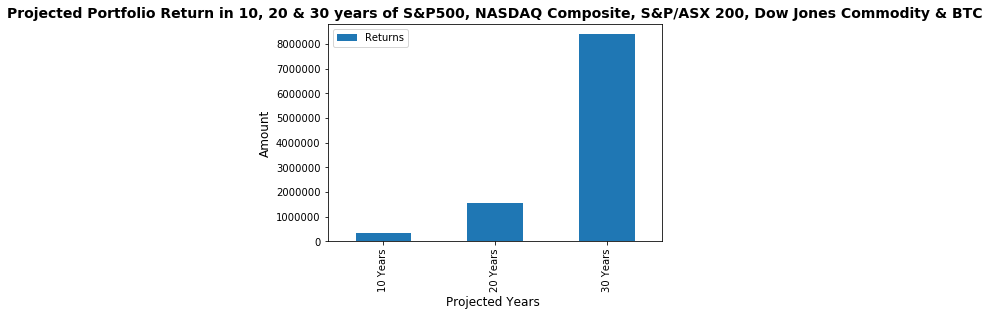

In [51]:
from matplotlib import pyplot as plt
proyection_returns.plot.bar(legend=False)

plt.xlabel('Projected Years ',fontsize=12)
plt.ylabel('Amount',fontsize=12)
plt.title('Projected Portfolio Return in 10, 20 & 30 years of S&P500, NASDAQ Composite, S&P/ASX 200, Dow Jones Commodity & BTC', fontweight='bold',fontsize=14)
plt.legend(['Returns'])
plt.savefig('Proyected_Portfolio_Returns.png')

## 